# This script contains the following points:

### 1. Import libraries

### 2. Loading and checking data

### 3. Data cleaning. Manipulations and Reprocessing

### 4. The Elbow technique

### 5. Make an informed decision about number of clusters

### 6. Run the K-meand algorithm

### 7. Attach cluster labels to the dataframe

### 8. Create visualizations of the clustered data

### 9. Discuss the clusters

### 10. Calculate descriptive statistics for clusters

### 11. How the K-means clustering results can be useful

### 12. Exporting the dataframe

# 1. Importing libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pylab as pl

In [3]:
warnings.filterwarnings('ignore')

# 2. Loading and Checking Data

In [4]:
# Define the path to the data files
path = r'C:\Users\Priya\COVID-19 Deaths Conditions'

In [5]:
path

'C:\\Users\\Priya\\COVID-19 Deaths Conditions'

In [6]:
# Load the dataset from Prepared data as "df_cov_19"
df_cov_19 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Cleaned_Conditions_Contributing_to_COVID-19_Deaths_by_State_and_Age_Provisional_2020-2023.csv'))

In [7]:
df_cov_19.head()

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,9/24/2023,1/1/2020,1/31/2020,2020,1,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN
1,9/24/2023,2/1/2020,2/29/2020,2020,2,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN
2,9/24/2023,3/1/2020,3/31/2020,2020,3,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN
3,9/24/2023,4/1/2020,4/30/2020,2020,4,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN
4,9/24/2023,5/1/2020,5/31/2020,2020,5,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN


In [8]:
df_cov_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430560 entries, 0 to 430559
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Data As Of          430560 non-null  object
 1   Start Date          430560 non-null  object
 2   End Date            430560 non-null  object
 3   Year                430560 non-null  int64 
 4   Month               430560 non-null  int64 
 5   State               430560 non-null  object
 6   Condition Group     430560 non-null  object
 7   Condition           430560 non-null  object
 8   ICD10_codes         430560 non-null  object
 9   Age Group           430560 non-null  object
 10  COVID-19 Deaths     430560 non-null  int64 
 11  Number of Mentions  430560 non-null  int64 
 12  Flag                150829 non-null  object
dtypes: int64(4), object(9)
memory usage: 42.7+ MB


In [9]:
df_cov_19.shape

(430560, 13)

# 3. Data Cleaning, Manipulations and Reprocessing

In [10]:
# Drop non-numeric columns
df_cov_19_numeric = df_cov_19.select_dtypes(include=[np.number])

In [11]:
# Check non-numeric columns are dropped
df_cov_19_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430560 entries, 0 to 430559
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Year                430560 non-null  int64
 1   Month               430560 non-null  int64
 2   COVID-19 Deaths     430560 non-null  int64
 3   Number of Mentions  430560 non-null  int64
dtypes: int64(4)
memory usage: 13.1 MB


In [12]:
# Select relevant features for clustering
features = df_cov_19_numeric[['COVID-19 Deaths', 'Number of Mentions']]

In [13]:
# Check selection
features.head()

,COVID-19 Deaths,Number of Mentions
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [14]:
# Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [15]:
# Check standardization
pd.DataFrame(scaled_features, columns = features.columns).head()

,COVID-19 Deaths,Number of Mentions
0,-0.202209,-0.206349
1,-0.202209,-0.206349
2,-0.202209,-0.206349
3,-0.202209,-0.206349
4,-0.202209,-0.206349


# 4. The Elbow Technique

In [16]:
# Using the elbow technique with the negative intertia (score) method
num_cl = range(1,10)
kmeans = [KMeans(n_clusters = i) for i in num_cl]
score = [kmeans[i].fit(scaled_features).score(scaled_features) for i in range(len(kmeans))]

score

[-861119.9999993149,
 -411570.61960260646,
 -233781.99641215138,
 -149817.44508898677,
 -104460.10500968657,
 -74380.21311517977,
 -57428.876555766015,
 -44873.916302024125,
 -37726.704990070146]

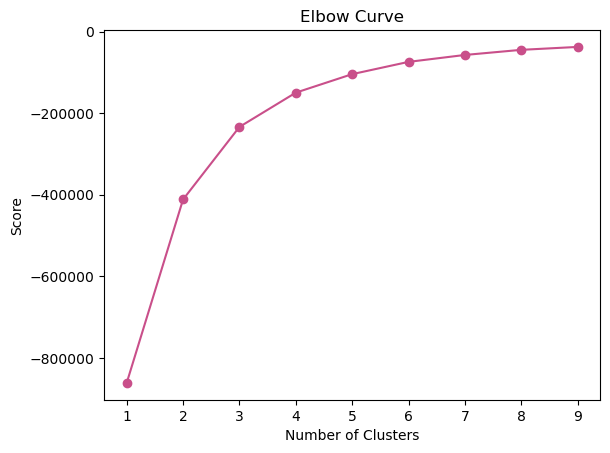

In [29]:
# Plot the elbow method graph with pylab
pl.plot(num_cl, score, marker = 'o', color = '#c94f8a')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')

# Export the elbow method graph
file_name = os.path.join(path, '04 Analysis', 'Visualizations', 'elbow_method_pylab.png')
pl.savefig(file_name)
pl.show()

# 5. Make an Informed Decision about Number of Clusters

### Based on the elbow plot, the optimal number of clusters appears to be 4 because the curve starts to flatten around 4 clusters.

# 6. Run the K-means Algorithm

In [18]:
# Apply the K-means algorithm to the standardized data with the chosen number of clusters, 4
optimal_clusters = 4
kmeans = KMeans(n_clusters = optimal_clusters, random_state = 18, n_init = 10)

# 7. Attach Cluster Labels to the Dataframe

In [19]:
# Add the cluster labels to the original dataframe and to the subset
df_cov_19['Cluster'] = kmeans.fit_predict(scaled_features)
df_cov_19_numeric['Cluster'] = kmeans.fit_predict(scaled_features)

In [20]:
# Check cluster assignment
df_cov_19_numeric.head()

,Year,Month,COVID-19 Deaths,Number of Mentions,Cluster
0,2020,1,0,0,0
1,2020,2,0,0,0
2,2020,3,0,0,0
3,2020,4,0,0,0
4,2020,5,0,0,0


# 8. Create Visualizations of the Clusterd Data

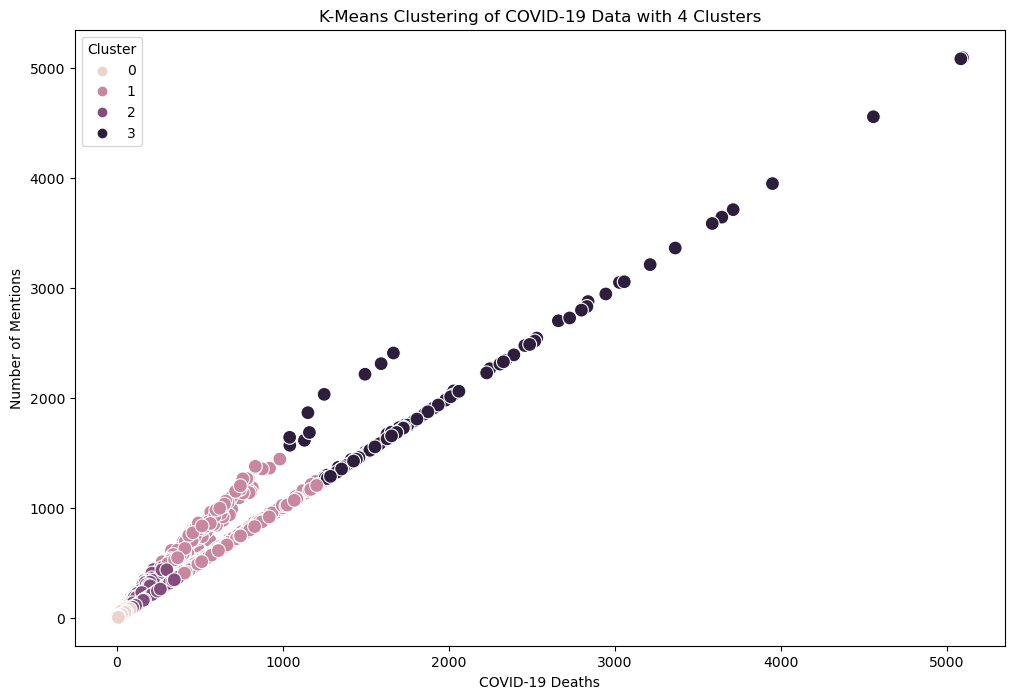

In [21]:
# Plotting the clusters of COVID-19 Deaths and Number of Mentions
plt.figure(figsize=(12,8))
sns.scatterplot(data = df_cov_19_numeric, x = 'COVID-19 Deaths', y = 'Number of Mentions', hue = 'Cluster', color = ['#892a58','#c94f8a','#e19dbe','#f3d8e5'], s = 100)
plt.title('K-Means Clustering of COVID-19 Data with 4 Clusters')
plt.xlabel('COVID-19 Deaths')
plt.ylabel('Number of Mentions')
plt.legend(title = 'Cluster')

# Export the scatterplot of clusters
file_name = os.path.join(path, '04 Analysis', 'Visualizations', 'kmeans_clustering.png')
plt.savefig(file_name)
plt.show()

### Perform additional k-means clustering analyses focusing on the top 5 conditions identified in the previous exercises:
Influenza and pneumonia

Vascular and unspecified dementia

Ischemic heart disease

Diabetes

Renal failure

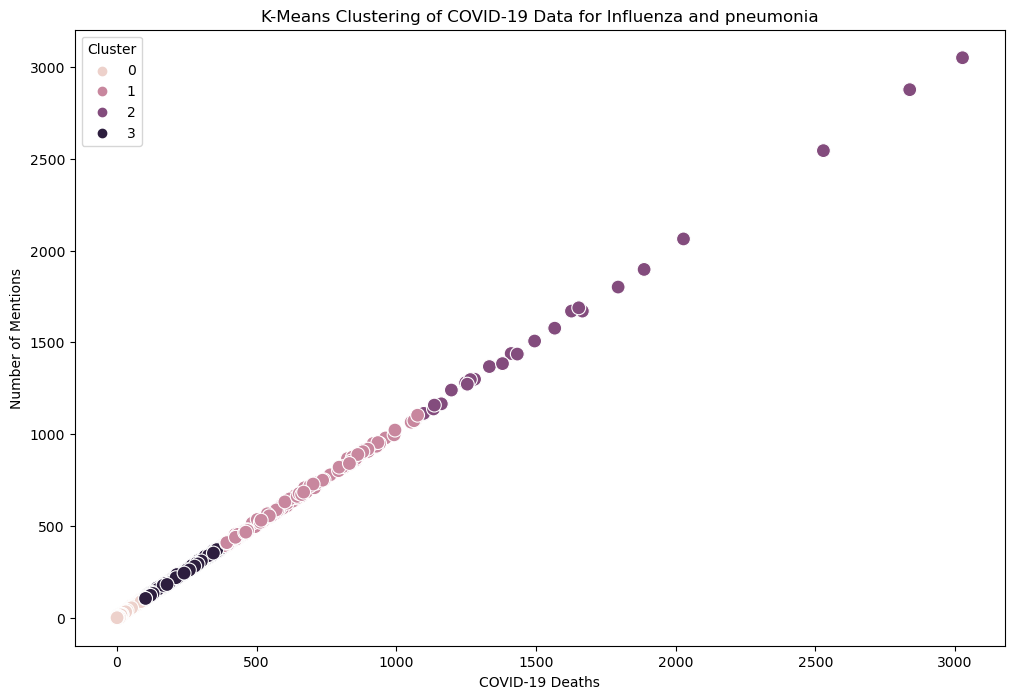

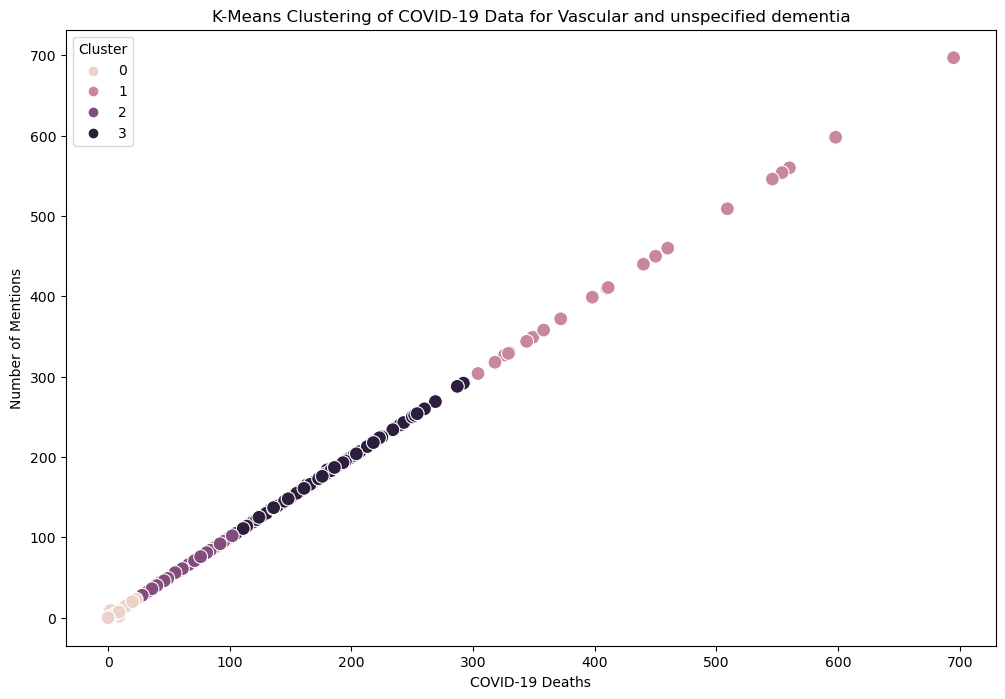

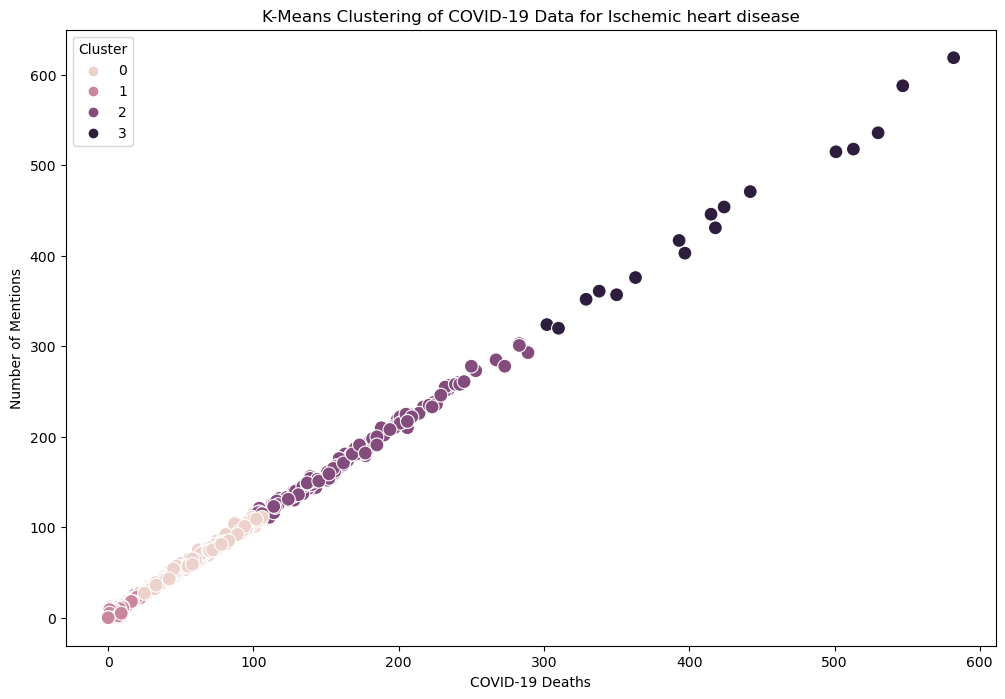

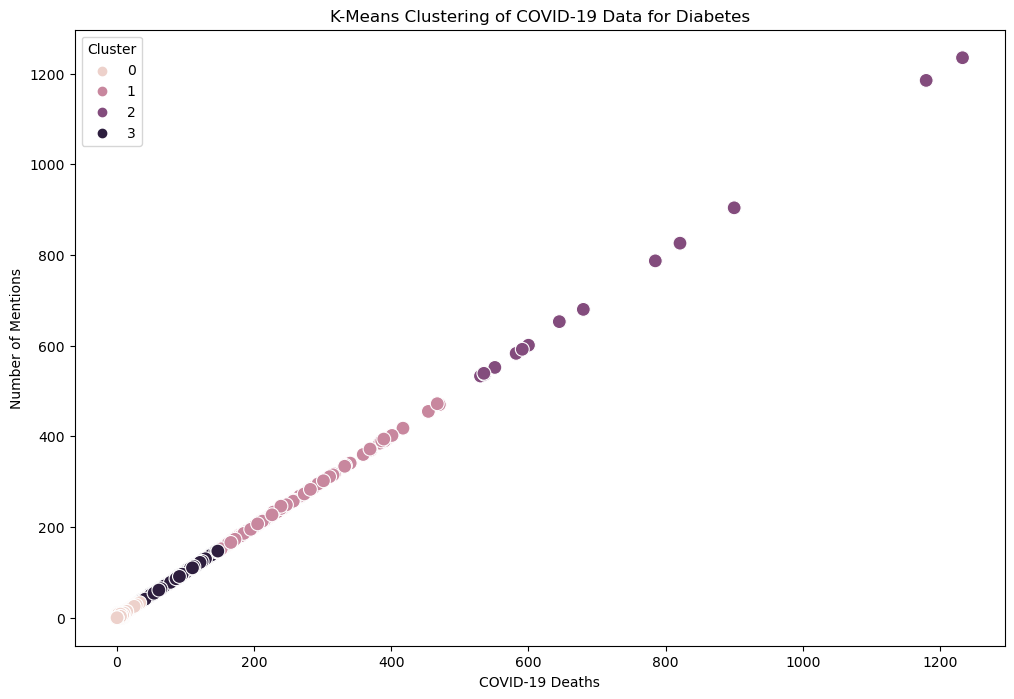

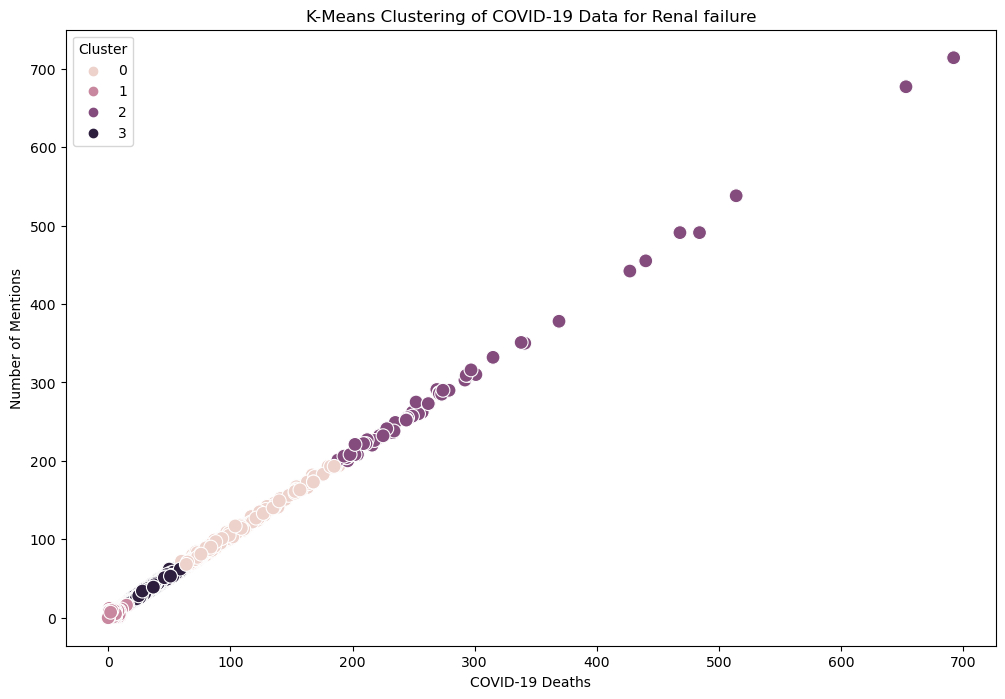

In [28]:
# Filter the dataset to include only the selected conditions
top_conditions = ['Influenza and pneumonia', 'Vascular and unspecified dementia', 'Ischemic heart disease', 'Diabetes', 'Renal failure']

# Loop through each condition, runniing the k-means clustering analysis and creating scatterplots
for condition in top_conditions:
    # Filter the dataset for the specific condition
    df_condition = df_cov_19[df_cov_19['Condition'] == condition].copy()
    
    # Select relevant features for clustering
    features_condition = df_condition[['COVID-19 Deaths', 'Number of Mentions']]
    
    # Standardize the data
    scaled_features_condition = scaler.fit_transform(features_condition)
             
    # Run K-Means algorithm using optimal clusters = 4
    kmeans_condition = KMeans(n_clusters=optimal_clusters, random_state=18, n_init=10)
    df_condition.loc[:, 'Cluster'] = kmeans_condition.fit_predict(scaled_features_condition)
        
    # Scatterplot for the specific condition
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data = df_condition, x = 'COVID-19 Deaths', y = 'Number of Mentions', hue = 'Cluster', color = ['#892a58','#c94f8a','#e19dbe','#f3d8e5'] , s = 100)
    plt.title(f'K-Means Clustering of COVID-19 Data for {condition}')
    plt.xlabel('COVID-19 Deaths')
    plt.ylabel('Number of Mentions')
    plt.legend(title='Cluster')
        
    # Export the scatter plot
    file_name = os.path.join(path, '04 Analysis', 'Visualizations', f'kmeans_clustering_{condition.replace(" ", "_").lower()}.png')
    plt.savefig(file_name)
    plt.show()

# 9. Discuss the Clusters

### The clusters make sense ad they group data points with similar numbers of COVID-19 Deaths and Number of Mentions. Cluster 0 is the largest, indicating most data points have low numbera of deaths and mentions. Cluster 1 and 2 represent groups with increasing numbers of deaths and mentions, and cluster 3 is between clusters 0 and 1 indicating a moderate number of deaths and mentions.

### The clusters can be interpreted meaningfully in the context of COVID-19 impact:
Cluster 0 represents minimal impact

Cluster 3 represents moderate impact

Cluster 1 represents high impact

Cluster 2 represents very high impact

# 10. Calculate Descriptive Statistics for Clusters

In [23]:
# Descriptive stats for clusters
cluster_stats = df_cov_19_numeric.groupby('Cluster').agg(['count', 'mean', 'std', 'min', 'max'])
cluster_stats

Year                                      Month            \
          count         mean       std   min   max   count      mean   
Cluster                                                                
0        419520  2021.412898  1.086691  2020  2023  419520  6.195035   
1          1196  2020.761706  0.734725  2020  2023    1196  6.026756   
2          9715  2020.930623  0.807064  2020  2023    9715  6.450335   
3           129  2020.720930  0.637092  2020  2022     129  5.100775   

                          COVID-19 Deaths                                 \
              std min max           count         mean         std   min   
Cluster                                                                    
0        3.328141   1  12          419520     5.502024   10.734266     0   
1        4.306961   1  12            1196   586.466555  204.482536   272   
2        4.079365   1  12            9715   149.112712   70.134416    50   
3        4.249715   1  12             129  1856.984496  759.551944  1040   

              Number of Mentions                                       
          max              count         mean         std   min   max  
Cluster                                                                
0          81             419520     5.905523   11.777931     0   108  
1        1242               1196   630.506689  216.959624   384  1443  
2         382               9715   164.143901   76.423258    82   471  
3        5094                129  1907.046512  744.326939  1250  5094

## Interpretation of Descriptive Statistics:
### Variability and Spread: The standard deviation values indicate that there is considerable variability within clusters, especially in Cluster 1 and 2, which have high variability in COVID-19 deaths and mentions.

### Comaprisom Across Clusters: The mean values of COVID-19 deaths and mentions increase progressively from Cluster 0 to Cluster 2, highlighting the gradient of COVID-19 impact across different clusters.

# 11. How the K-means Clustering results can be useful

### The K-means clustering analysis can be useful in multiple future steps in an analytics pipeline. For example, by using cluster labels as new features in feature engineering or by incorporating these labels into predictive modeling to improve the accuracy and context-awarness of the models. Additionally, creating visualizations and reports based on cluster differences can enhance the communication of insights and lead to better informed decision-making.

# 12. Exporting the Dataframe

In [24]:
# check of the "merged_data" dataframe before exporting
df_cov_19.head()

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag,Cluster
0,9/24/2023,1/1/2020,1/31/2020,2020,1,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN,0
1,9/24/2023,2/1/2020,2/29/2020,2020,2,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN,0
2,9/24/2023,3/1/2020,3/31/2020,2020,3,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN,0
3,9/24/2023,4/1/2020,4/30/2020,2020,4,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN,0
4,9/24/2023,5/1/2020,5/31/2020,2020,5,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN,0


In [25]:
df_cov_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430560 entries, 0 to 430559
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Data As Of          430560 non-null  object
 1   Start Date          430560 non-null  object
 2   End Date            430560 non-null  object
 3   Year                430560 non-null  int64 
 4   Month               430560 non-null  int64 
 5   State               430560 non-null  object
 6   Condition Group     430560 non-null  object
 7   Condition           430560 non-null  object
 8   ICD10_codes         430560 non-null  object
 9   Age Group           430560 non-null  object
 10  COVID-19 Deaths     430560 non-null  int64 
 11  Number of Mentions  430560 non-null  int64 
 12  Flag                150829 non-null  object
 13  Cluster             430560 non-null  int32 
dtypes: int32(1), int64(4), object(9)
memory usage: 44.3+ MB


In [26]:
df_cov_19.shape

(430560, 14)

In [27]:
# Export the "df_cov_19" dataframe to CSV
df_cov_19.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clustered_covid_data.csv'), index=False)